In [67]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report

import xgboost as xgb
import h2o
from h2o.automl import H2OAutoML
import numpy as np
import pandas as pd
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [3]:
params = {'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.6,
  'objective': 'reg:squarederror',
  'min_child_weight': 3.0,
  'nthread': 4,
  'seed': 7,
  'max_depth': 5,
  'colsample_bytree': 0.9,
  'lambda': 10.0,
  'gamma': 0.0,
  'alpha': 0.01,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 46,
  'subsample': 0.6,
  'max_delta_step': 0.0,
  'tree_method': 'exact'}

In [ ]:
df = pd.read_pickle("../../data/df.pkl")
df = df.loc[df.type_bool == True]
df

In [63]:
X = df.loc[:, [col for col in df.columns if 'f' in col]].values
y = df.loc[:, 'REDSHIFT_SPEC'].values
X_train = X[0 : int(len(X)/2 )]
y_train = y[0 : int(len(X)/2 )]
X_test = X[int(len(X)/2 ):]

In [62]:
model= xgb.XGBRegressor(**params)

In [64]:
model.fit(X_train,y_train)

[00:51:53] WARNING: ../src/learner.cc:516: 
Parameters: { nround, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(alpha=0.01, base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6, colsample_bynode=1, colsample_bytree=0.9,
             eta=0.3, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type='gain', interaction_constraints='', lambda=10.0,
             learning_rate=0.300000012, max_delta_step=0.0, max_depth=5,
             min_child_weight=3.0, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, nround=46, nthread=4,
             num_parallel_tree=1, objective='reg:squarederror', random_state=7,
             reg_alpha=0.00999999978, reg_lambda=10, scale_pos_weight=1, seed=7, ...)

In [66]:
preds = model.predict(data=X_test)
preds

array([0.6950425 , 0.59334654, 0.5980158 , ..., 0.75778055, 0.8850206 ,
       0.46530318], dtype=float32)

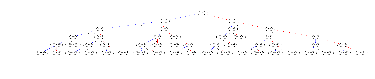

In [73]:
plot_tree(model)
plt.show()

In [82]:
#len(disso ai embaixo) = 2539
res = model.apply(X_test)
res

array([[31, 41, 37, ..., 46, 35, 40],
       [41, 41, 37, ..., 46, 52, 32],
       [42, 42, 40, ..., 46, 62, 32],
       ...,
       [38, 33, 33, ..., 45, 52, 29],
       [30, 30, 29, ..., 34, 39, 31],
       [47, 28, 42, ..., 32, 50, 32]], dtype=int32)

In [83]:
res.shape

(2539, 100)

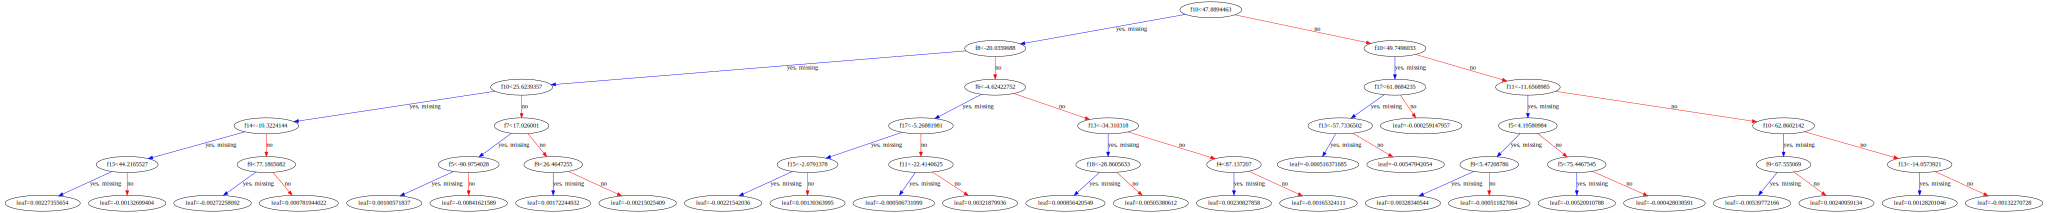

In [93]:
xgb.to_graphviz(model, num_trees = 99)

In [99]:
model_skl = xgb.sklearn.XGBRegressor(**params)

In [101]:
model_skl.fit(X_train,y_train)

[01:18:21] WARNING: ../src/learner.cc:516: 
Parameters: { nround, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(alpha=0.01, base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6, colsample_bynode=1, colsample_bytree=0.9,
             eta=0.3, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type='gain', interaction_constraints='', lambda=10.0,
             learning_rate=0.300000012, max_delta_step=0.0, max_depth=5,
             min_child_weight=3.0, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, nround=46, nthread=4,
             num_parallel_tree=1, objective='reg:squarederror', random_state=7,
             reg_alpha=0.00999999978, reg_lambda=10, scale_pos_weight=1, seed=7, ...)

In [102]:
y_preds = np.column_stack([
    estimator.predict(X_test)
    for estimator in model_skl.estimators_
])

AttributeError: 'XGBRegressor' object has no attribute 'estimators_'

In [ ]:
model_skl.

In [86]:
model.predict

In [87]:
preds = model.predict(data=X_test, pred_leaf = True)


TypeError: predict() got an unexpected keyword argument 'pred_leaf'

In [50]:
xgb_reg = xgb.XGBClassifier(**params)
#TODO Testar pra ver se a previsão é a mesma

In [9]:
df = pd.read_pickle("../../data/df.pkl")
df = df.loc[df.type_bool == True]
df

,desg,desi,desr,desz,Xaxis,desg_GP,desi_GP,desr_GP,desz_GP,wavelets,...,f14,f15,f16,f17,f18,f19,f20,type,type_bool,REDSHIFT_SPEC
ID,,,,,,,,,,,,,,,,,,,,,
SN10005,"[[10.027000000001863, 4.996, 8.081], [33.94500...","[[0.015000000006693881, 0.2977, 2.206], [18.94...","[[0.0, 1.033, 1.325], [13.015000000006694, 0.4...","[[0.03500000000349246, 1.826, 3.029], [48.875,...","[0.0, 1.0381919191919462, 2.0763838383838924, ...","([10.027000000001863, 10.782565656567513, 11.5...","([0.015000000006693881, 1.0530404040470573, 2....","([0.0, 1.0281717171717606, 2.056343434343521, ...","([0.03500000000349246, 1.0222929292964054, 2.0...","[2.000004411755352, 2.000003547336676, 2.00000...",...,-26.554909,15.768490,16.436792,17.114795,-20.292951,-24.222566,-11.295562,Ia,True,1.08327
SN10007,"[[0.0, 6.266, 10.48], [10.105999999999767, 17....","[[0.03200000000651926, 7.161, 9.313], [2.01600...","[[2.0, 1.24, 2.429], [10.121000000006461, 20.0...","[[0.9770000000062282, 0.6586, 5.329], [15.9930...","[0.0, 1.5136565656566285, 3.027313131313257, 4...","([0.0, 1.5132626262626456, 3.0265252525252913,...","([0.03200000000651926, 1.5451717171782005, 3.0...","([2.0, 3.49314141414145, 4.9862828282829, 6.47...","([0.9770000000062282, 2.480787878794107, 3.984...","[11.341091517194192, 8.812204685737349, 6.9798...",...,-99.877031,21.670852,24.155364,-26.622112,-27.616185,-19.981432,49.299250,Ia,True,0.82331
SN100361,"[[6.957000000002154, 16.02, 23.92], [7.9690000...","[[0.023000000001047738, 4.903, 3.324], [6.9840...","[[0.0, 0.7103, 2.626], [5.9760000000023865, 5....","[[8.055000000000291, 2.567, 2.665], [15.035000...","[0.0, 1.3031111111111275, 2.606222222222255, 3...","([6.957000000002154, 8.15910101010318, 9.36120...","([0.023000000001047738, 1.315494949496019, 2.6...","([0.0, 1.3026767676768058, 2.6053535353536117,...","([8.055000000000291, 9.27674747474778, 10.4984...","[8.233549869515556, 9.464488874691614, 10.4511...",...,102.074783,-95.727930,4.861555,-29.749073,23.442440,5.441237,12.503390,Ia,True,0.90012
SN100471,"[[0.0, 3.79, 4.764], [11.969000000004598, 1.67...","[[0.023999999997613486, 2.202, 3.146], [3.0429...","[[0.008000000001629815, 0.4567, 2.129], [3.004...","[[0.046999999998661224, 6.92, 2.486], [3.07500...","[0.0, 1.4638181818181601, 2.9276363636363203, ...","([0.0, 1.3621414141414037, 2.7242828282828073,...","([0.023999999997613486, 1.4875757575733735, 2....","([0.008000000001629815, 1.3701818181834458, 2....","([0.046999999998661224, 1.3283737373723963, 2....","[5.63245418874034, 5.603687474301877, 5.594769...",...,-40.831628,28.629443,12.801879,-0.555542,13.065768,-21.776767,9.358561,Ia,True,0.92640
SN100490,"[[0.0, 0.01278, 2.833], [8.11699999999837, 1.7...","[[0.026999999994586688, 1.849, 5.434], [8.1449...","[[15.0, 0.4107, 4.054], [46.042999999997846, 6...","[[1.1679999999978463, 1.572, 6.291], [49.96899...","[0.0, 0.7267979797979933, 1.4535959595959866, ...","([0.0, 0.5955656565656131, 1.1911313131312262,...","([0.026999999994586688, 0.7435858585804729, 1....","([15.0, 15.565262626262582, 16.130525252525164...","([1.1679999999978463, 1.8829999999978817, 2.59...","[8.351889035545303, 8.47302530763294, 8.594179...",...,-36.484191,38.259352,-88.907842,76.656123,50.003481,-5.379145,-57.678266,Ia,True,0.73814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN98918,"[[0.0, 3.693, 2.686], [4.984000000004016, 18.7...","[[5.94100000000617, 6.403, 9.191], [13.1840000...","[[4.996000000006461, 8.241, 6.049], [12.141000...","[[0.027000000001862645, 3.092, 4.045], [5.0120...","[0.0, 1.3522323232323885, 2.704464646464777, 4...","([0.0, 1.3017676767676767, 2.6035353535353534,...","([5.94100000000617, 7.233222222228395, 8.52544...","([4.996000000006461, 6.297686868693313, 7.5993...","([0.027000000001862645, 1.2480808080826955, 2....","[16.23491946702271, 16.82763060047037, 17.3637...",...,-34.255294,-4.973908,11.915895,-56.738013,-27.269352,9.479893,7.803001,Ia,True,0.76083
SN99404,"[[0.0, 6.586, 10.48], [15

In [10]:
X = df.loc[:, [col for col in df.columns if 'f' in col]].values
y = df.loc[:, 'REDSHIFT_SPEC'].values
X_train = X[0 : int(len(X)/2 )]
y_train = y[0 : int(len(X)/2 )]
X_test = X[int(len(X)/2 ):]

In [37]:
xgb_model = xgb.train(param, dtrain, num_round)

NameError: name 'dtrain' is not defined

In [60]:
reg = xgb.train(params, X_train, 2)

TypeError: ('invalid cache item: ndarray', [array([[ 9.91249089e+02,  3.55109919e+02,  6.29068430e+02, ...,
        -8.40954507e+01, -9.25665639e+01,  2.05145490e+01],
       [ 3.46059341e+03,  1.01734415e+03,  1.27560429e+03, ...,
        -7.17692918e-01, -2.25565057e+02,  7.17794267e+01],
       [ 4.57930651e+02, -1.40657934e+02,  9.38460458e+02, ...,
         1.55940470e+01,  8.30512031e+01, -4.89805045e+01],
       ...,
       [ 1.16333114e+03,  8.09184736e+02, -2.95596011e+02, ...,
         5.41028609e+01,  1.23784935e+02, -1.41652072e+01],
       [ 1.12263921e+02, -3.16444431e+02, -4.57665405e+02, ...,
        -1.94813044e+00,  3.83551488e+01, -5.15267341e+01],
       [ 6.03226124e+00,  1.99628778e+01,  3.88016681e+02, ...,
        -1.42468640e+01,  7.73354591e+01, -2.73201717e+01]])])

In [36]:
xgb_clf.fit(X_train,y_train)

[00:12:08] WARNING: ../src/learner.cc:516: 
Parameters: { nround, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




KeyboardInterrupt: 

In [33]:
y

array([1.08327, 0.82331, 0.90012, ..., 0.75966, 0.80886, 0.40625])

In [ ]:
X_test

In [25]:
xgb_clf.predict(X_test)

NotFittedError: need to call fit or load_model beforehand

In [40]:
rfc.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

In [2]:
df = pd.read_csv('features_target.csv', index_col='ID')

In [3]:
df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,type,type_bool,REDSHIFT_SPEC,zphot
ID,,,,,,,,,,,,,,,,,,,,,
SN509279,-49.624961,119.718702,367.632993,-70.695833,80.129330,96.283763,-48.562017,107.448833,-348.620391,149.441336,...,49.884274,82.560061,-94.391054,-86.511354,26.779625,-60.881068,Ia,True,0.65538,0.664635
SN509387,79.868870,50.895147,630.138253,8.163604,103.762597,142.555618,-65.617557,89.663532,-303.958612,304.104492,...,135.784689,196.657130,-74.459661,-83.874633,25.921586,-63.886573,Ia,True,0.45100,0.595537
SN50950,-261.459419,404.856636,-162.747210,-143.947925,138.650997,-2.607287,168.332348,49.960998,146.390271,71.904632,...,40.663644,76.159330,40.570551,12.182103,27.299124,10.842452,Ia,True,0.51480,0.527787
SN509630,-375.500879,362.448772,-89.572957,39.401883,103.042300,0.835855,195.386168,86.170492,89.551685,31.566139,...,-17.538851,32.414132,29.735733,16.959055,8.597079,-1.332496,Ia,True,0.68329,0.576743
SN509788,-560.447298,360.793597,-58.472612,-42.227885,91.801062,-71.501177,173.352048,38.386115,74.315491,25.471279,...,18.865166,32.816584,7.165867,12.670261,5.325844,7.495878,Ia,True,0.82267,0.843193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN98918,-368.165184,174.502476,-33.795512,-17.710726,16.975462,-34.323715,37.531632,10.284584,13.434439,1.337147,...,-4.973908,11.915895,-56.738013,-27.269352,9.479893,7.803001,Ia,True,0.76083,0.305526
SN99404,75.250412,-416.682911,-1210.356344,1589.772176,772.420546,600.699826,992.827072,-114.167837,-852.688358,769.938189,...,-1269.560018,826.117566,-2224.164801,66.007045,341.497556,-173.911137,Ia,True,0.89529,0.844159
SN99438,-441.101977,192.724698,191.988336,-32.272491,-15.309361,15.367184,-71.078983,81.343335,-187.437409,97.762652,...,-34.417710,32.878026,-33.942007,34.613437,61.324861,-51.210871,Ia,True,0.75966,0.537314


In [41]:
X = df.loc[:, [col for col in df.columns if 'f' in col]].values
y = df.loc[:, 'REDSHIFT_SPEC'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
len(y_test)

1676

In [44]:
rfc = RandomForestRegressor()

In [45]:
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
y_pred = rfc.predict(X_test)

In [47]:
y_preds = np.column_stack([
    estimator.predict(X_test)
    for estimator in rfc.estimators_
])

In [48]:
y_preds.shape

(1676, 100)

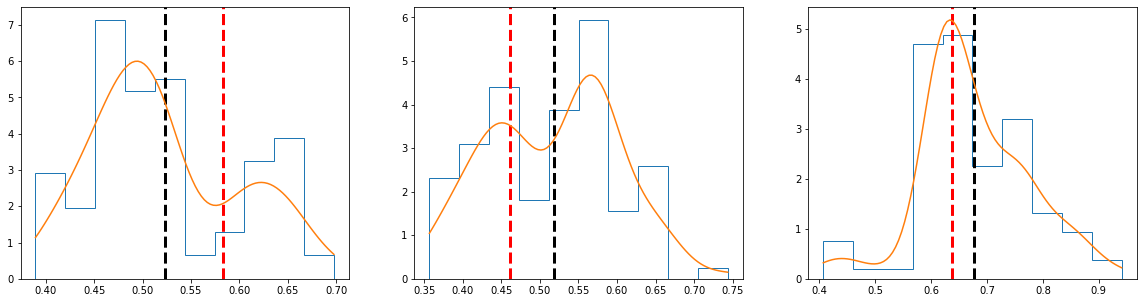

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for i, ax in enumerate(axs):
    
    y = y_preds[i]
    
    x = np.linspace(y.min(), y.max(), 100)
    
    ax.axvline(y_pred[i], c='k', ls='--', lw='3')
    ax.axvline(y_test[i], c='r', ls='--', lw='3')
    
    ax.hist(y, density=True, histtype='step')
    
    pdf = gaussian_kde(y).pdf(x)
    
    ax.plot(x, pdf)